## Initialize the Smiles2Peptide Interface

**Description:**  
This example shows how to import and initialize the `Smiles2Peptide` class, which is the main the peptide handling.

**Steps:**  
1. Import the `Smiles2Peptide` class from the `smiles2peptides.interface` module.  
2. Create an instance of the `Smiles2Peptide` class.

**Expected output:**  
An initialized `Smiles2Peptide` object ready for use in subsequent peptide tasks.

---


In [1]:
from smiles2peptides.interface import Smiles2Peptide

smiles2peptides = Smiles2Peptide(custom_dict_path="copy_modified_amino_acids_library.xlsx")

## Generate Peptide Molecules from Peptide Strings

**Description:**  
This example demonstrates how to convert peptide notation strings into molecular representations using the `Smiles2Peptide` interface. It also visualizes the peptide structures.

**Steps:**  
1. Define a list of peptide strings with specific notations.  
2. Iterate over each peptide string.  
3. Use the `get_peptide` method to convert the peptide string into an RDKit molecule object.  
4. Optionally plot the peptide molecule structure.  
5. Print the original peptide string.

**Expected output:**  
For each peptide string, the corresponding molecular structure is displayed, and the peptide notation is printed in the output.

---


Peptide: {pra}w{Pra}nT{am}


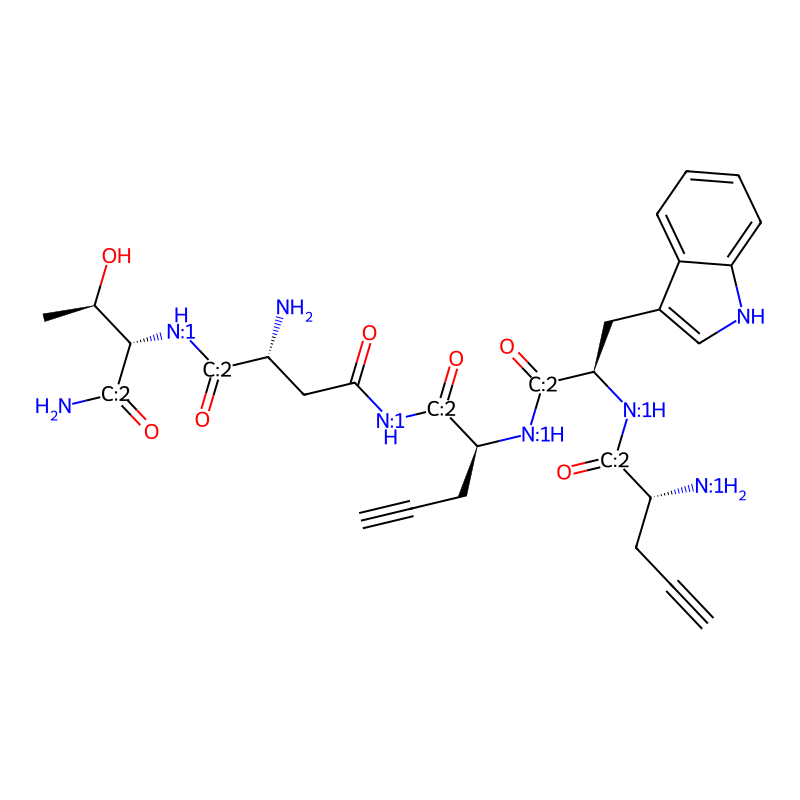

Peptide: r{k-(4-Bba)}vrctci{pra}{am}


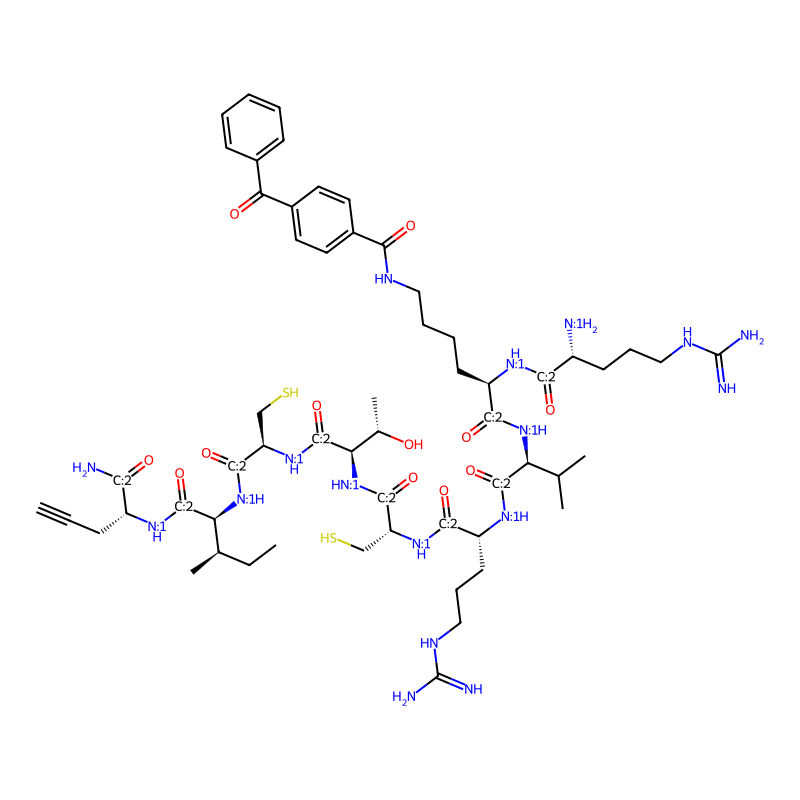

Peptide: {PEG2}prl{am}


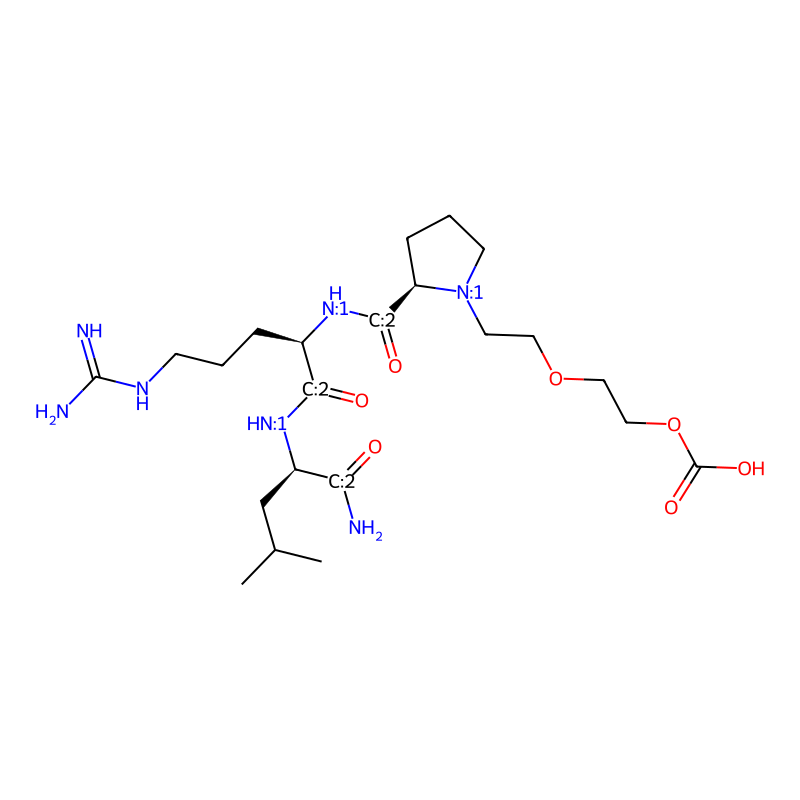

In [2]:
peptides = [
            "{pra}w{Pra}nT{am}",
            "r{k-(4-Bba)}vrctci{pra}{am}",
            "{PEG2}prl{am}"
            #"{PEG2}pr{GlcNAc-T}l{am}",
            ]

for pep in peptides:
    print('Peptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=True) #<--- This is the RdKit molecule object for the peptide"
    

## Generate Peptides and Highlight the Peptide Bond

**Description:**  
This example generates peptide molecules from notation strings and highlights the peptide bonds within the molecular structure to emphasize the connections between amino acids.

**Steps:**  
1. Define a list of peptide notation strings.  
2. For each peptide string, generate the RDKit molecule object.  
3. Plot or visualize the peptide with the peptide bonds highlighted.

**Expected output:**  
A visual representation of each peptide molecule with the peptide bonds clearly highlighted.

---


Peptide: {PEG4[CH2CH2]}rtvrctci{am}


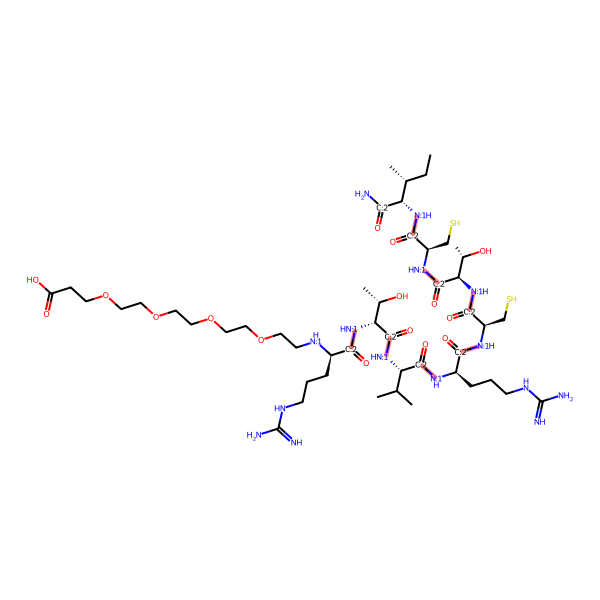

Peptide: {pra}w{Pra}nT{am}


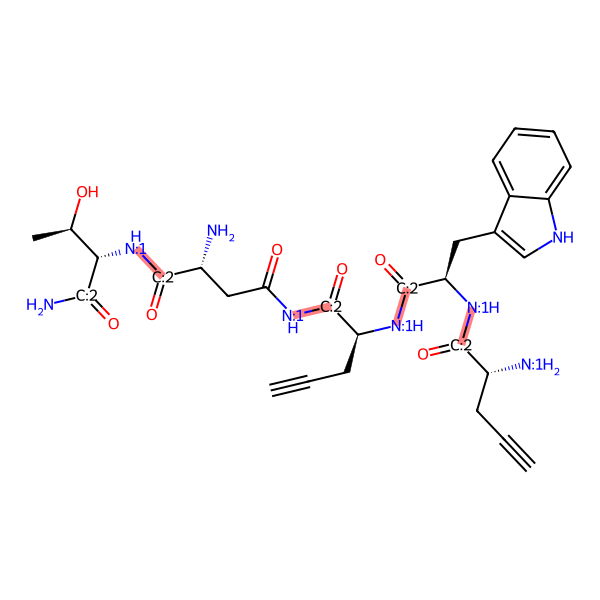

Peptide: {PEG2}prl{am}


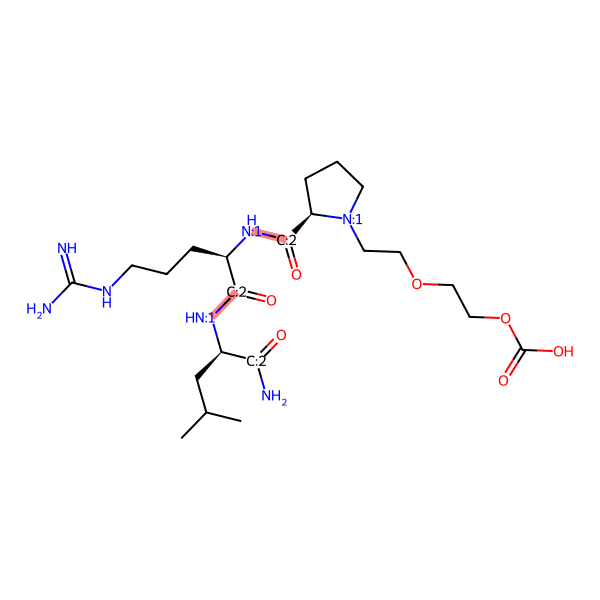

Peptide: r{k-(4-Bba)}vrctci{pra}{am}


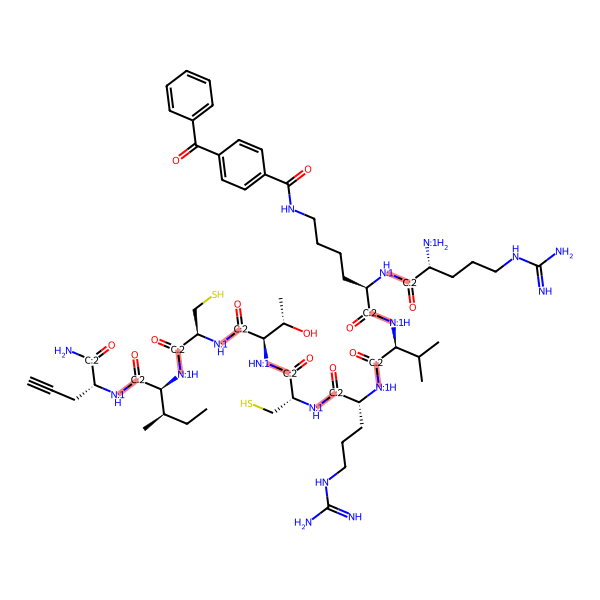

In [3]:
peptides = [
            "{PEG4[CH2CH2]}rtvrctci{am}",
            "{pra}w{Pra}nT{am}",
            "{PEG2}prl{am}",
#            "{PEG2}pr{GlcNAc-T}l{am}",
            "r{k-(4-Bba)}vrctci{pra}{am}"
            ]

for pep in peptides:
    print('Peptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False) #<--- This is the RdKit molecule object for the peptide"
    smiles2peptides.get_plot_aminoacids(mol, highlight_bonds=True, obtain_amino_acids=False)

## Fragment Peptides into Individual Amino Acids

**Description:**  
This example demonstrates how to fragment peptide molecules into their constituent amino acids. The amino acids are extracted and visualized separately without highlighting the bonds.

**Steps:**  
1. Define a list of peptide notation strings.  
2. For each peptide, generate the RDKit molecule object without plotting the full peptide.  
3. Use `get_plot_aminoacids` to fragment the peptide into amino acids and visualize them.  
4. Print the peptide string.

**Expected output:**  
Separate visualizations of each amino acid fragment extracted from the peptide, with the peptide notation printed.

---


Peptide: {PEG4[CH2CH2]}rtvrctci{am}


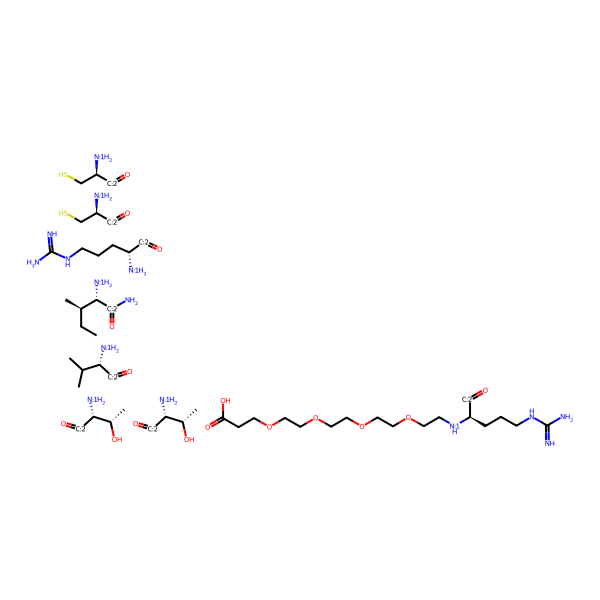

Peptide: {pra}w{Pra}nT{am}


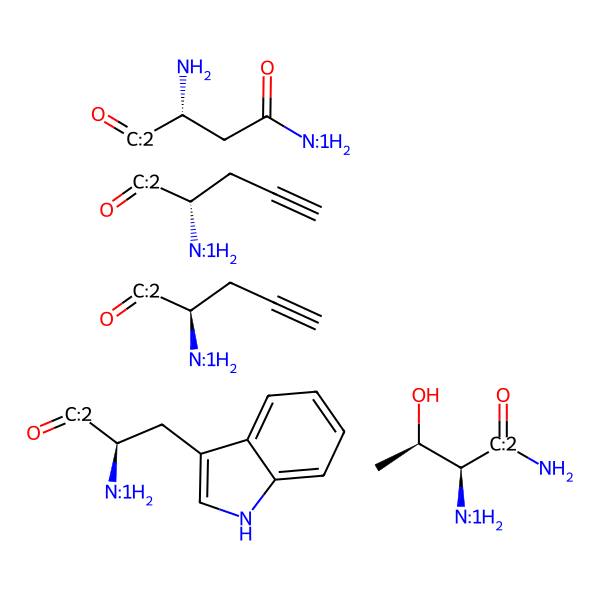

Peptide: {PEG2}prl{am}


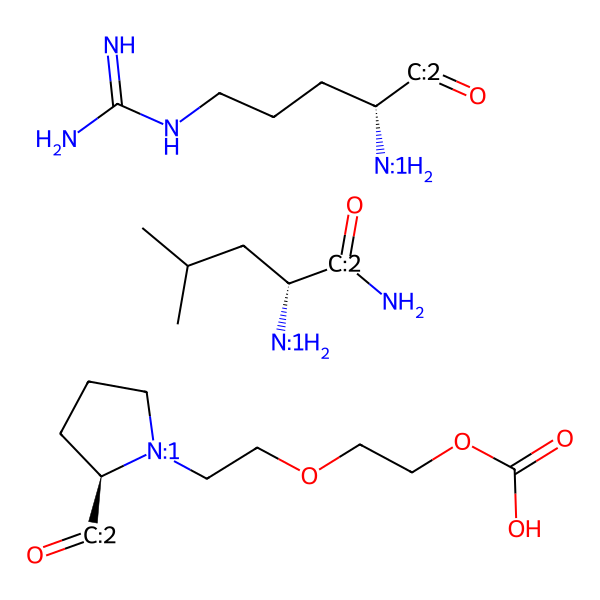

Peptide: r{k-(4-Bba)}vrctci{pra}{am}


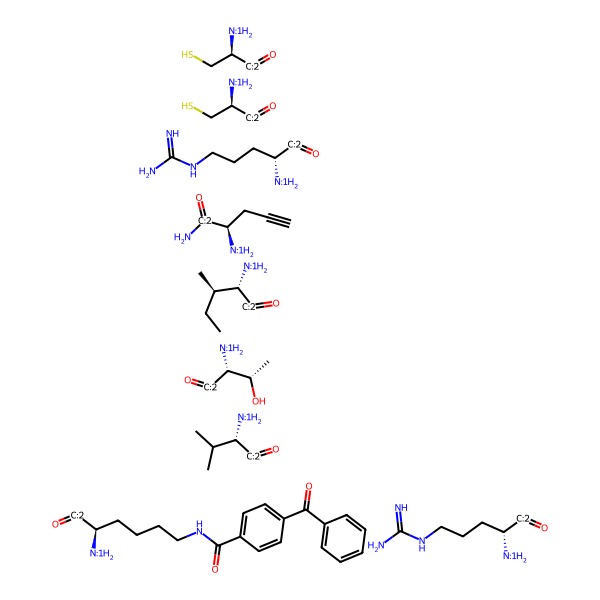

In [4]:
peptides = [
            "{PEG4[CH2CH2]}rtvrctci{am}",
            "{pra}w{Pra}nT{am}",
            "{PEG2}prl{am}",
            #"{PEG2}pr{GlcNAc-T}l{am}",
            'r{k-(4-Bba)}vrctci{pra}{am}'
            ]

for pep in peptides:
    print('Peptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False) #<--- This is the RdKit molecule object for the peptide."
    smiles2peptides.get_plot_aminoacids(mol, highlight_bonds=False, obtain_amino_acids=True)

## Extract Atomic-Level Features from Peptides

**Description:**  
This example shows how to extract atomic-level features from peptide molecules. It first prints a description of the atomic feature library, then processes each peptide to obtain node (atom) and edge (bond) features as tensors.

**Steps:**  
1. Print the description of the available atomic features library.  
2. Define a list of peptide notation strings.  
3. For each peptide, generate the RDKit molecule object without plotting the peptide.  
4. Extract atomic-level node and edge feature tensors from the molecule using `get_peptide_tensor_atomic_features`.  
5. Print the extracted node and edge features.

**Note:**  
The resulting tensors have dimensions where rows correspond to the number of atoms (for node features) or bonds (for edge features), and columns correspond to the different feature values for each atom or bond.

**Expected output:**  
- Description of atomic features library.  
- For each peptide, printed tensors representing node features and edge features with explained dimensions.

---

In [5]:
peptides = [
            "{pra}w{Pra}nT{am}",
            #"{PEG2}pr{GlcNAc-T}l{am}",
            'r{k-(4-Bba)}vrctci{pra}{am}',
            "{PEG2}prl{am}",
            ]

smiles2peptides.get_description_library_atomic_features()
print('-------------------------------------------------')
for pep in peptides:
    print('\nPeptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False) #<--- This is the RdKit molecule object for the peptide."
    nodes_features, edges_features = smiles2peptides.get_peptide_tensor_atomic_features(mol, device="cpu")
    print('Nodes features:', nodes_features)
    print('Edges features:', edges_features)
    #print('Nodes features Shape:', nodes_features.shape)
    #print('Edges features Shape:', edges_features.shape)


Node feature vector length: 21
Edge feature vector length: 16
-------------------------------------------------

Peptide: {pra}w{Pra}nT{am}
Nodes features: tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
         0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
         0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
         0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
         1., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
         0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
         0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
         0., 0., 0.],
        [1., 0., 0.,

KeyError: "Missing node keys in node_ft_dict: ['7_0_3_0_4_0']"

## Obtain Atomic Adjacency Matrix and Amino Acid Mapping

**Description:**  
This example extracts structural information from peptide molecules at the atomic level. 
- The adjacency matrix representing connections (bonds) between atoms.  
- A vector mapping each atom to its corresponding amino acid.

**Steps:**  
1. Define a list of peptide notation strings.  
2. For each peptide, generate the RDKit molecule object without plotting.  
3. Retrieve and print the adjacency matrix shape, which shows the connectivity between atoms.  
4. Retrieve and print the amino acid atom mapping vector, indicating which amino acid each atom belongs to.

**Note:**  
- The adjacency matrix here is represented as an edge index tensor with two rows: the first row lists the source atoms and the second row the target atoms for each bond.  
- The amino acid mapping vector assigns each atom an index corresponding to its amino acid.

**Expected output:**  
- Description of atomic features library.  
- For each peptide, printed adjacency matrix shape and amino acid mapping vector.

---

In [ ]:
peptides = [
            "{pra}w{Pra}nT{am}",
            "{PEG2}pr{GlcNAc-T}l{am}",
            'r{k-(4-Bba)}vrctci{pra}{am}',
            "{PEG4[CH2CH2]}rtvrctci{am}"
            ]

print('-------------------------------------------------')
for pep in peptides:
    print('\nPeptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False) #<--- This is the RdKit molecule object for the peptide."
    print(f"Adjacency Matrix Shape:", smiles2peptides.get_peptide_atomic_adjacency_matrix(mol, device="cpu"))
    print("Amino Acid mapping Vector:", smiles2peptides.get_amino_acid_atom_mapping(mol))
    print("Amino Acid Adj Matrix", smiles2peptides.get_amino_acid_adjacency_matrix(pep, device="cpu", architecture='linear'))
    

## Load Peptide Dataset with Natural and Non-Natural Amino Acids

**Description:**  
This example loads a peptide dataset containing both natural and non-natural amino acids from a CSV file. The dataset was sourced from the following publication:

He, Y., Song, X., Wan, H. et al. *AmpHGT: expanding prediction of antimicrobial activity in peptides containing non-canonical amino acids using multi-view constrained heterogeneous graph transformer.* BMC Biol 23, 184 (2025).  
[https://doi.org/10.1186/s12915-025-02253-4](https://doi.org/10.1186/s12915-025-02253-4)

**Steps:**   
1. Load the dataset CSV file into a DataFrame.  
2. Print the length of the dataset (number of rows).  
3. Display the first few rows of the dataset.

**Expected output:**  
- Number of peptide sequences in the dataset.  
- Preview of the dataset table including sequences with natural and non-natural amino acids.

---


In [ ]:
import pandas as pd

dataset = pd.read_csv('fasta_testing_p_4914_n_11323_aa_replaced.csv')
print('Dataset length:', len(dataset))
dataset.head()

## Convert Dataset Peptide Sequences to RDKit Molecules

**Description:**  
This example processes each peptide sequence from the loaded dataset by converting it into an RDKit molecule object using the `Smiles2Peptide` interface. The peptide structures are not plotted, but successful generation of the molecule object is confirmed by a printed message.

**Steps:**  
1. Extract the list of peptide sequences from the dataset's `'Sequence'` column.  
2. Iterate over each peptide sequence with its index.  
3. Convert the peptide sequence into an RDKit molecule object without plotting.  


---

In [ ]:
peptides = dataset['Sequence'].tolist()

for i, pep in enumerate(peptides):
    print(f'Peptide {i+1}: {pep}')
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False)
    print("RDKit Molecule Object Generated Successfully ✅")
    print('---------------------------------------------------')

## More Examples

In [ ]:
from smiles2peptides.interface import Smiles2Peptide

peptides = [
    "{pra}{FITC-Ahx}{Pra}nT{am}",
    "{PEG2}pr{GlcNAc-T}l{am}",
    "v{photo-L}{phospho-Y}l{4-tert-butyl-p}iK",
    "{acm-C}wM{4&5-hydrox-L}{(N-me)-a}{iso-Q}",
    "{4-hydrox-p}{seleno-C}R{trime-L}{3&4-dihydrox-F}G",
    "K{p-carboxyl-F}{photo-L}c{phospho-Y}{me-f}",
    "{nor-r}{photo-M}l{GlcNAc-S}H{me-f}",
    "i{h-s}{(N-me)-A}{Pra}w{acm-C}l",
    "d{p-carboxyl-f}{photo-L}{me-Y}K{C-me}",
    "{photo-l}{p-carboxyl-f}m{3-me-f}w{4-hydrox-p}",
    "a{Pra}{trime-L}y{photo-M}{iso-Q}",
    "{(N-me)-a}H{3-me-f}{photo-M}l{p-carboxyl-F}",
    "M{phospho-Y}{4-hydrox-P}d{acm-c}{Pra}",
    "n{4-hydrox-p}{GlcNAc-S}K{(N-me)-A}{4-tert-butyl-p}",
    "{succinyl-K}{photo-M}{4-hydrox-p}R{me-f}t",
    "G{me-F}{Dip-a}{photo-M}{p-carboxyl-f}{4-hydrox-p}",
    "{seleno-C}v{Pra}{p-carboxyl-F}{GlcNAc-T}w",
    "p{photo-L}{me-f}{trime-L}K{3&4-dihydrox-F}",
    "{4-hydrox-P}y{photo-M}{h-S}F",
    "W{p-carboxyl-f}M{photo-M}q{C-me}",
    "{phospho-S}{4-hydrox-p}l{succinyl-K}{3-me-f}V",
    "{photo-l}{seleno-C}{(N-me)-A}{4-hydrox-P}dF",
    "c{me-y}{photo-M}{3&4-dihydrox-F}{acm-C}t",
    "{GlcNAc-asn}{photo-M}n{h-S}{4-tert-butyl-p}l",
    "{iso-D}p{Pra}{me-f}H{p-carboxyl-F}",
    "{acm-c}{4-hydrox-P}G{(N-me)-A}R{photo-M}",
    "{4-hydrox-p}{photo-L}{succinyl-K}y{3-me-f}t",
    "L{me-f}{photo-M}{4&5-hydrox-L}m{iso-Q}",
    "{trime-L}H{4-hydrox-p}{photo-l}d{C-me}",
    "{Pra}{seleno-C}{4-hydrox-p}n{phospho-Y}L",
    "t{acm-C}{photo-M}{me-f}{4-tert-butyl-p}k",
    "{4-hydrox-p}V{3-me-f}{photo-l}y",
    "{4-hydrox-P}{photo-M}H{acm-c}m",
    "{succinyl-K}{photo-M}{p-carboxyl-f}{h-s}T",
    "F{3-me-f}{4-hydrox-p}{me-f}{Pra}w",
    "{photo-l}n{4&5-hydrox-L}M{trime-L}y",
    "{photo-M}{me-f}{phospho-Y}{4-hydrox-p}G{C-me}",
    "L{p-carboxyl-F}{photo-L}{Pra}h",
    "{(N-me)-a}{seleno-C}{photo-M}R{4-hydrox-p}w",
    "{phospho-S}{photo-l}{4-hydrox-P}{3-me-f}yM",
    "{photo-L}F{h-s}{GlcNAc-T}{Pra}c",
    "{trime-L}{4-hydrox-p}y{photo-M}{me-f}k",
    "R{(N-me)-A}{4-hydrox-p}{Pra}{4-tert-butyl-p}l",
    "a{photo-M}{me-F}{4-hydrox-p}{succinyl-K}n",
    "K{4-hydrox-p}{photo-l}q{(N-me)-a}",
    "{4-hydrox-P}{Pra}{acm-C}{photo-M}Lw",
    "{photo-l}G{p-carboxyl-f}{me-f}d",
    "{photo-M}{4-hydrox-p}{GlcNAc-asn}R{3-me-f}v",
    "{me-y}{photo-L}{4-hydrox-P}{succinyl-K}F",
    "{p-carboxyl-f}t{photo-M}K{h-s}{(N-me)-A}"
] 


for pep in peptides:
    print('Peptide: ', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=True)
    print("RDKit Molecule Object Generated Successfully ✅")
    print('---------------------------------------------------')



## More Examples....

In [ ]:
peptides = [
    "ARNDC", "QEGHI", "LKMFPS", "TWYVAG", "arndc", "qeGhi", "lkmfps", "twyvG",  # L y D individuales
    "AGrdkV", "FPlheT", "GcNqYr", "kMWtvS", "YhGRaC", "LVnpQA", "iGpeKD", "sRqGMF",
    "GfTclWr", "aKGHlp", "MGryta", "wNEKGi{am}", "dvmGqTH", "QRPGvya", "hSLcwmK", "GiFNrya", 
    "eGlVqRM", "aGHkpTV", "CGLsnqA", "ytmwGRP", "sGHvQeM", "KGnywva", "HFctGMp", "GrkLhNa",
    "aGKhdPL", "RMGyVnt", "AQlecvF", "wsiKNrG", "pAGTYwL", "kcGHvmD", "aWErPGt", "qMhGLra",
    "rGnCAyL", "DVKGlta", "{ac}sykNpGA", "mQGhRtv", "FhpKGwG", "VnGtkLC", "aiGHydp", "rVLaTGM",
    "GEKhFML", "tGRsaYv"
]

for pep in peptides:
    print('Peptide:', pep)
    mol = smiles2peptides.get_peptide(pep, plot_peptide=False)
    print("RDKit Molecule Object Generated Successfully ✅")
    print('---------------------------------------------------')
    


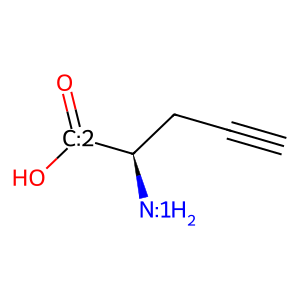

In [18]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = "[NH2:1][C@H](CC#C)[C:2](=O)O"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)
